# Enunciado

Foram coletados dados sobre a quantidade de chuva por dia (em milímetros), 
durante 14 dias, para dois locais distintos. O pesquisador notou que o local A 
aparenta ter maior variabilidade na quantidade chuva, comparativamente ao 
local B. Neste sentido, deseja testar a hipótese de que a variabilidade na 
quantidade de chuva é significativamente maior em A do que em B. Realize o 
teste F para testar tal hipótese. 

# Imports

In [1]:
import pandas as pd
from scipy.stats import f

# Leitura dos dados

In [2]:
alpha = 0.05 # Nível de significância

df = pd.read_excel('dados.xlsx')
df

,Local A (mm),Local B (mm)
0,8.9,5.6
1,7.7,4.9
2,8.6,6.6
3,3.9,5.9
4,7.6,6.5
5,10.2,5.9
6,9.6,3.6
7,8.9,5.6
8,9.6,8.8
9,5.5,7.8


# Resolução

In [3]:
def calcular_coeficiente_variacao(media, desvio_padrao):
    if media != 0:
        return (desvio_padrao / media) * 100
    else:
        return None

In [4]:
var_local_a = df['Local A (mm)'].var()
var_local_b = df['Local B (mm)'].var()

print(f"Variancia Local A (mm): {var_local_a:.4f}")
print(f"Variancia Local B (mm): {var_local_b:.4f}")

media_local_a = df['Local A (mm)'].mean()
media_local_b = df['Local B (mm)'].mean()
desvio_padrao_local_a = df['Local A (mm)'].std()
desvio_padrao_local_b = df['Local B (mm)'].std()
coeficiente_variacao_local_a = calcular_coeficiente_variacao(media_local_a, desvio_padrao_local_a)
coeficiente_variacao_local_b = calcular_coeficiente_variacao(media_local_b, desvio_padrao_local_b)

print(f"Coeficiente de Variacao Local A (mm): {coeficiente_variacao_local_a:.4f}%")
print(f"Coeficiente de Variacao Local B (mm): {coeficiente_variacao_local_b:.4f}%")

Variancia Local A (mm): 11.6044
Variancia Local B (mm): 4.2027
Coeficiente de Variacao Local A (mm): 54.1947%
Coeficiente de Variacao Local B (mm): 29.9277%


Para essa amostra, de fato, a variância de chuva do Local A é bem maior que do local B. 

In [ ]:
local_a = df['Local A (mm)']
local_b = df['Local B (mm)']

# Calcular a estatística F
# Por convenção, a maior variância vai no numerador
if var_local_a >= var_local_b:
    f_calculado = var_local_a / var_local_b
    gl_num = len(local_a) - 1
    gl_den = len(local_b) - 1
    print("Variância de A é maior ou igual à variância de B.")
else:
    f_calculado = var_local_b / var_local_a
    gl_num = len(local_b) - 1
    gl_den = len(local_a) - 1
    print("Variância de B é maior que a variância de A.")

print(f"Estatística F: {f_calculado}")
print(f"Graus de liberdade do numerador: {gl_num}")
print(f"Graus de liberdade do denominador: {gl_den}")

Variância de A é maior ou igual à variância de B.
Estatística F: 2.761181346337381
Graus de liberdade do numerador: 13
Graus de liberdade do denominador: 13


In [6]:
p_value = f.sf(f_calculado, gl_num, gl_den) # sf = 1 - cdf
print(f"P-valor: {p_value}")

if p_value < alpha:
    print("Rejeitamos a hipótese nula de que as variâncias são iguais.")
else:
    print("Não rejeitamos a hipótese nula de que as variâncias são iguais.")

P-valor: 0.03917205449902492
Rejeitamos a hipótese nula de que as variâncias são iguais.


Ou seja, a variabilidade de chuvas no local A é maior que no local B.

Caso queria fazer pelo F critico

In [7]:
f_critico = f.ppf(1 - alpha, gl_num, gl_den)

if f_calculado > f_critico:
    print(f"Para alpha = 0.05, como F calculado ({f_calculado:.4f}) > F crítico ({f_critico:.4f}), rejeitamos H0 (as variâncias são diferentes).")
else:
    print(f"Para alpha = 0.05, como F calculado ({f_calculado:.4f}) <= F crítico ({f_critico:.4f}), não rejeitamos H0 (não há evidência suficiente para dizer que as variâncias são diferentes).")

Para alpha = 0.05, como F calculado (2.7612) > F crítico (2.5769), rejeitamos H0 (as variâncias são diferentes).


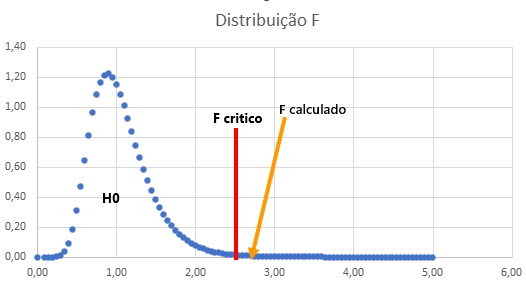
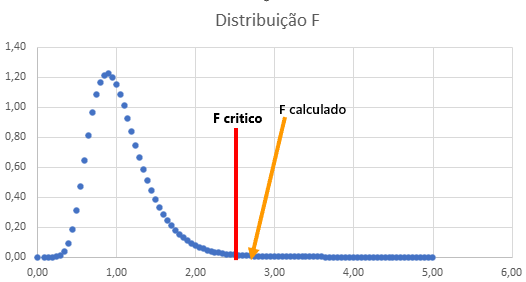
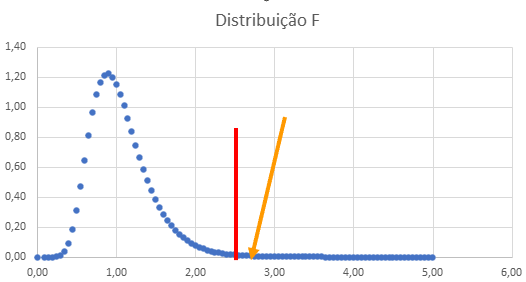